<span style="font-size: 30px; font-weight:bold; color:cyan;">Curcumin Molecules - Compute molecular descriptors for ML Training</span>

<span style="font-size: 16px; font-weight:medium;">*The objective of this project is to analyze a set of synthesized curcumin molecules by leveraging their `SMILES` representations. The goal is to compute molecular descriptors, specifically the HOMO-LUMO gap, and subsequently employ machine learning techniques to predict these gaps.*</span>

<span style="font-size: 16px; font-weight:medium;">*We will utilize both experimental data and the `Harvard Organic Photovoltaic Dataset` to enhance the prediction accuracy of our model. The HOPV dataset includes a collation of experimental photovoltaic data from literature, along with corresponding quantum-chemical calculations performed over a range of conformers, using various density functionals and basis sets.*</span>

- <span style="font-size: 16px; font-weight:medium; color:yellow;">Collect the SMILES representations and experimentally calculated HOMO-LUMO gaps for the synthesized curcumin molecules with DFT values, and quantum-chemical calculations from OPV dataset</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Generate `molecular fingerprints` for the curcumin molecules.</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Filter the OPV dataset to include molecules structurally similar to the curcumin molecules using similarity measures `Tanimoto similarity`.</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Train a machine learning model and Predict the HOMO-LUMO gaps for the curcumin molecules using the trained model.</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Compare the predicted gaps with the experimentally calculated gaps to assess the model's accuracy.</span>

In [1]:
import rdkit
import pycaret
import joblib

print('rdkit: %s' % rdkit.__version__)
print('pycaret: %s' % pycaret.__version__)
print('joblib: %s' % joblib.__version__)

rdkit: 2023.09.5
pycaret: 3.2.0
joblib: 1.3.2


In [1]:
curcumin_variants_dict = {
    "curcumin_variant00": "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "curcumin_variant01": "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "curcumin_variant02": "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "curcumin_variant03": "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1ccccc1cc3ccccc23)=C4)cc5",
    "curcumin_variant04": "COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)=[O+][B-](F)(F)O2)c3",
    "curcumin_variant05": "COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+][B-](F)(F)O2)ccc3O",
    "curcumin_variant06": "F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc(Br)cc2)=[O+]3",
    "curcumin_variant07": "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant08": "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant09": "CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant10": "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "curcumin_variant11": "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "curcumin_variant12": "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "curcumin_variant13": "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "curcumin_variant14": "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "curcumin_variant15": "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "curcumin_variant16": "N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant17": "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant18": "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant19": "CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C2(C)C)=[O+][B-](F)(F)O3)C(C)(C)c4ccccc45",
    "curcumin_variant20": "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(SC)cc1)=C2)cc3",
    "curcumin_variant21": "CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant22": "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "curcumin_variant23": "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2c1ccccc1n(C)c2c3)=C4)cc5",
    "curcumin_variant24": "COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B-](F)(F)O3",
    "curcumin_variant25": "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
}

In [3]:
%%time
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors

# Defining the SMILES strings for the cucumin varients
curcumin_variants = (
    "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1ccccc1cc3ccccc23)=C4)cc5",
    "COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)=[O+][B-](F)(F)O2)c3",
    "COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+][B-](F)(F)O2)ccc3O",
    "F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc(Br)cc2)=[O+]3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C2(C)C)=[O+][B-](F)(F)O3)C(C)(C)c4ccccc45",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(SC)cc1)=C2)cc3",
    "CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2c1ccccc1n(C)c2c3)=C4)cc5",
    "COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B-](F)(F)O3",
    "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
)

# Defining the molecule names and HOMO-LUMO Gap
molecule_names = ['2-ADMeO3', '3-MR83a', 'AD-10', 'AD-1013', 'AD-1022', 'AD-11', 'AD-12', 'AD-13', 'AD-13-DMF', 'AD-14-Moore', 'AD-15', 'AD-15-DMF', 'AD-16-DMF', 'AD-18', 'AD-24', 'AD-25', 'AD-3', 'AD-35', 'AD-4', 'AD-48', 'AD-5', 'AD-6', 'AD-7', 'AD-8', 'AD-9', 'YD-30']
homo_lumo_gap = [3.077, 3.072, 3.259, 2.625, 2.938, 2.946, 3.191, 3.226, 3.228, 2.811, 2.971, 2.813, 3.231, 2.735, 2.878, 2.686, 3.215, 2.77, 3.001, 2.702, 2.97, 2.89, 2.859, 2.97, 3.137, 2.525]

molecules = [Chem.MolFromSmiles(smiles) for smiles in curcumin_variants]
mws = [round(Descriptors.MolWt(mol),3) for mol in molecules]
logp = [Descriptors.MolLogP(mol) for mol in molecules]

# Create the initial DataFrame
data = {
    'Molecule': molecule_names,
    'Molecular Weight': mws,
    'LogP': logp,
    'Homo-Lumo Gap (eV)': homo_lumo_gap,
    'Smiles': curcumin_variants
}
curcumin_df = pd.DataFrame(data)

# Harvard OPV dataset import
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/havard-smile-opv/main/Non-fullerene%20small-molecules%20acceptors.csv')
opv_df = data.drop(columns=[
    'index', 'inchikey', 'HOMO_calc', 'LUMO_calc', 'LUMO_calib', 'LUMO_calib_stds',
    'HOMO_calib', 'HOMO_calib_stds', 'molW', 'PCE_calc', 'Voc_calc', 'Jsc_calc',
    'FF_calc', 'EQE_calc', 'PCE_calib', 'Voc_calib', 'Jsc_calib', 'FF_calib',
    'EQE_calib', 'PCE_cdiff', 'PCE_calib_plus'], axis=1)

# Add 'mol' column
opv_df["mol"] = opv_df["smiles"].apply(Chem.MolFromSmiles)

# Curcumin segments
curcumin_similarity_variants = {
    "seg01": "Cc2ccc(/C=C/C(=O)CC(=O)/C=C/c1ccc(C)cc1)cc2",
    "seg02": "C/C=C/C(=O)CC(=O)/C=C/c1ccc(C)cc1",
    "seg03": "C/C=C/C(=O)CC(=O)/C=C/C",
    "seg04": "Cc1ccc(/C=C/C=O)cc1",
    "seg05": "C/C=C/C=O",
    "seg06": "C/C=C/C1=CC(/C=C/C)=[O+][B-](F)(F)O1",
}

# Function to calculate similarity
def calculate_similarity(fp1, fp2, metric="dice"):
    if metric == "dice":
        return DataStructs.DiceSimilarity(fp1, fp2)
    elif metric == "cosine":
        return DataStructs.CosineSimilarity(fp1, fp2)
    elif metric == "kulczynski":
        return DataStructs.KulczynskiSimilarity(fp1, fp2)
    else:
        raise ValueError(f"Unknown similarity metric: {metric}")

# atom pair fingerprint function convert to bitvector
def atom_pair_to_bitvector(mol):
    fp = AllChem.GetAtomPairFingerprint(mol)
    bit_fp = AllChem.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=2048)
    return bit_fp

# Dictionary to hold the dataframes
similarity_dfs = {}

# Fingerprint types and similarity metrics
fingerprints = {
    "morgan": lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048),
    "atom_pair": lambda mol: atom_pair_to_bitvector(mol),
    "maccs": lambda mol: MACCSkeys.GenMACCSKeys(mol)
}

metrics = ["dice", "cosine", "kulczynski"]

# Loop over curcumin segments and create similarity dataframes
for key, smiles in curcumin_similarity_variants.items():
    specific_mol = Chem.MolFromSmiles(smiles)
    
    for fp_name, fp_func in fingerprints.items():
        specific_fp = fp_func(specific_mol)
        
        for metric in metrics:
            # Calculate similarity and create a new dataframe with similarity scores
            opv_df_sim_segment = opv_df.copy()
            opv_df_sim_segment[f'similarity_{key}_{fp_name}_{metric}'] = opv_df_sim_segment['mol'].apply(
                lambda x: calculate_similarity(fp_func(x), specific_fp, metric)
            )
            
            # Filter top 10% similar molecules
            quantile_value = opv_df_sim_segment[f'similarity_{key}_{fp_name}_{metric}'].quantile(0.9)
            filtered_df = opv_df_sim_segment[opv_df_sim_segment[f'similarity_{key}_{fp_name}_{metric}'] >= quantile_value]
            
            # Keep only the relevant columns (initial columns + similarity)
            filtered_df = filtered_df[['smiles', 'mol', 'GAP_calib', f'similarity_{key}_{fp_name}_{metric}']]
            
            # Store the filtered dataframe in the dictionary
            similarity_dfs[f'{key}_{fp_name}_{metric}'] = filtered_df

            print(f"Filtered dataframe for segment {key}, fingerprint {fp_name}, metric {metric}: shape {filtered_df.shape}")

Filtered dataframe for segment seg01, fingerprint morgan, metric dice: shape (5181, 4)
Filtered dataframe for segment seg01, fingerprint morgan, metric cosine: shape (5205, 4)
Filtered dataframe for segment seg01, fingerprint morgan, metric kulczynski: shape (5355, 4)
Filtered dataframe for segment seg01, fingerprint atom_pair, metric dice: shape (5129, 4)
Filtered dataframe for segment seg01, fingerprint atom_pair, metric cosine: shape (5128, 4)
Filtered dataframe for segment seg01, fingerprint atom_pair, metric kulczynski: shape (5128, 4)
Filtered dataframe for segment seg01, fingerprint maccs, metric dice: shape (6068, 4)
Filtered dataframe for segment seg01, fingerprint maccs, metric cosine: shape (5240, 4)
Filtered dataframe for segment seg01, fingerprint maccs, metric kulczynski: shape (5414, 4)
Filtered dataframe for segment seg02, fingerprint morgan, metric dice: shape (5235, 4)
Filtered dataframe for segment seg02, fingerprint morgan, metric cosine: shape (5184, 4)
Filtered da

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints safely
def generate_morgan_fingerprint_safe(smiles):
    """Generate Morgan fingerprint and handle errors gracefully."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048))
    except Exception:
        return None
    return None

similarity_dfs_top10 = {}

# Process each dataframe in the similarity_dfs dictionary
for key, df in similarity_dfs.items():
    print(f"Processing {key} segment...")
    df['Morgan_Fingerprints'] = df['smiles'].apply(generate_morgan_fingerprint_safe)
    df = df[df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
    morgan_df = pd.DataFrame(df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
    df_mf = pd.concat([df.drop(columns=['Morgan_Fingerprints']), morgan_df], axis=1)
    
    # Store in the new dictionary
    similarity_dfs_top10[key] = df_mf    
    print(f"Done processing {key} segment - shape {df_mf.shape}")

# Unpacking the dictionary
for segment in similarity_dfs_top10.keys():
    globals()[f'similarity_dfs_top10_{segment}'] = similarity_dfs_top10[segment]

Processing seg01_morgan_dice segment...
Done processing seg01_morgan_dice segment - shape (5181, 2052)
Processing seg01_morgan_cosine segment...
Done processing seg01_morgan_cosine segment - shape (5205, 2052)
Processing seg01_morgan_kulczynski segment...
Done processing seg01_morgan_kulczynski segment - shape (5355, 2052)
Processing seg01_atom_pair_dice segment...
Done processing seg01_atom_pair_dice segment - shape (5129, 2052)
Processing seg01_atom_pair_cosine segment...
Done processing seg01_atom_pair_cosine segment - shape (5128, 2052)
Processing seg01_atom_pair_kulczynski segment...
Done processing seg01_atom_pair_kulczynski segment - shape (5128, 2052)
Processing seg01_maccs_dice segment...
Done processing seg01_maccs_dice segment - shape (6068, 2052)
Processing seg01_maccs_cosine segment...
Done processing seg01_maccs_cosine segment - shape (5240, 2052)
Processing seg01_maccs_kulczynski segment...
Done processing seg01_maccs_kulczynski segment - shape (5414, 2052)
Processing se

In [12]:
%%time
from pycaret.regression import *

# Define similarity methods and segments
similarity_methods = ['morgan_dice', 'morgan_cosine', 'morgan_kulczynski',
                      'atom_pair_dice', 'atom_pair_cosine', 'atom_pair_kulczynski',
                      'maccs_dice', 'maccs_cosine', 'maccs_kulczynski']
segments = ['seg01', 'seg02', 'seg03', 'seg04', 'seg05', 'seg06']

# Create a list of tuples for dataframes
dataframes = [
    (f'similarity_dfs_top10_{segment}_{method}', globals()[f'similarity_dfs_top10_{segment}_{method}'])
    for method in similarity_methods
    for segment in segments
]

models_to_include = ['xgboost', 'lightgbm', 'knn', 'par', 'ridge']

results = []

for name, df in dataframes:
    print(f"Processing {name}...")
    X = df.iloc[:, 4:]
    y = df['GAP_calib']

    setup_data = pd.concat([X, y], axis=1)
    regression_setup = setup(setup_data, target='GAP_calib', session_id=123,
                             verbose=False, train_size=0.75)
    best_model = compare_models(include=models_to_include, sort='r2',
                                      verbose=False)
    
    best_model_results = pull()
    best_model_results['segment'] = name

    results.append(best_model_results)
    print(f"Done processing {name}...")

final_results_top10 = pd.concat(results).reset_index(drop=True)
final_results_top10.head()

Processing similarity_dfs_top10_seg01_morgan_dice...
Done processing similarity_dfs_top10_seg01_morgan_dice...
Processing similarity_dfs_top10_seg02_morgan_dice...
Done processing similarity_dfs_top10_seg02_morgan_dice...
Processing similarity_dfs_top10_seg03_morgan_dice...
Done processing similarity_dfs_top10_seg03_morgan_dice...
Processing similarity_dfs_top10_seg04_morgan_dice...
Done processing similarity_dfs_top10_seg04_morgan_dice...
Processing similarity_dfs_top10_seg05_morgan_dice...
Done processing similarity_dfs_top10_seg05_morgan_dice...
Processing similarity_dfs_top10_seg06_morgan_dice...
Done processing similarity_dfs_top10_seg06_morgan_dice...
Processing similarity_dfs_top10_seg01_morgan_cosine...
Done processing similarity_dfs_top10_seg01_morgan_cosine...
Processing similarity_dfs_top10_seg02_morgan_cosine...
Done processing similarity_dfs_top10_seg02_morgan_cosine...
Processing similarity_dfs_top10_seg03_morgan_cosine...
Done processing similarity_dfs_top10_seg03_morgan

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),segment
0,Light Gradient Boosting Machine,0.1665,0.0515,0.2267,0.8570,0.0612,0.0619,0.678,similarity_dfs_top10_seg01_morgan_dice
1,Extreme Gradient Boosting,0.1683,0.0526,0.2292,0.8536,0.0610,0.0615,0.711,similarity_dfs_top10_seg01_morgan_dice
2,Ridge Regression,0.1826,0.0615,0.2479,0.8288,0.0683,0.0681,0.146,similarity_dfs_top10_seg01_morgan_dice
3,Passive Aggressive Regressor,0.2160,0.0807,0.2838,0.7757,0.0783,0.0796,0.120,similarity_dfs_top10_seg01_morgan_dice
4,K Neighbors Regressor,0.2400,0.1158,0.3400,0.6783,0.0938,0.0948,0.083,similarity_dfs_top10_seg01_morgan_dice


In [104]:
import pandas as pd

# Define similarity methods and fingerprints
similarity_methods = ["dice", "cosine", "kulczynski"]
fingerprints = ["morgan", "atom", "maccs"]

# Define the mappings
fingerprint_mapping = {
    "morgan": "Morgan Fingerprint",
    "atom": "Atom Pair Fingerprint",
    "maccs": "MACCS Fingerprint"
}

similarity_mapping = {
    "dice": "Dice Similarity",
    "cosine": "Cosine Similarity",
    "kulczynski": "Kulczynski Similarity"
}

# Function to extract fingerprint, similarity, and segment from the segment string
def extract_fingerprint_similarity_segment(segment):
    parts = segment.split('_')
    # Extract fingerprint
    fingerprint = next((fp for fp in fingerprints if fp in parts), None)
    # Extract similarity
    similarity = next((sim for sim in similarity_methods if sim in parts), None)
    # Extract segment number
    segment_number = next((part for part in parts if part.startswith('seg')), None)
    # Format segment number
    if segment_number:
        segment_number = f"Seg{segment_number[-2:]}"  # Extract last two digits
    return fingerprint, similarity, segment_number

# Function to map fingerprint and similarity names
def map_fingerprint(fingerprint):
    return fingerprint_mapping.get(fingerprint, fingerprint)

def map_similarity(similarity):
    return similarity_mapping.get(similarity, similarity)

# Apply the extraction function and create new columns
final_results_top10[['Fingerprint', 'Similarity', 'Curcumin Segment']] = final_results_top10['segment'].apply(lambda x: pd.Series(extract_fingerprint_similarity_segment(x)))

# Apply the mapping functions to the new columns
final_results_top10['Fingerprint'] = final_results_top10['Fingerprint'].apply(map_fingerprint)
final_results_top10['Similarity'] = final_results_top10['Similarity'].apply(map_similarity)

# Create the Modified Segment column
final_results_top10['Modified Segment'] = final_results_top10.apply(
    lambda row: f"{row['Curcumin Segment']}_{row['Fingerprint'].split()[0]}_{row['Similarity'].split()[0]}",
    axis=1
)

# Display the updated DataFrame
final_results_top10.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),segment,Fingerprint,Similarity,Curcumin Segment,Modified Segment
0,Light Gradient Boosting Machine,0.1665,0.0515,0.2267,0.8570,0.0612,0.0619,0.678,similarity_dfs_top10_seg01_morgan_dice,Morgan Fingerprint,Dice Similarity,Seg01,Seg01_Morgan_Dice
1,Extreme Gradient Boosting,0.1683,0.0526,0.2292,0.8536,0.0610,0.0615,0.711,similarity_dfs_top10_seg01_morgan_dice,Morgan Fingerprint,Dice Similarity,Seg01,Seg01_Morgan_Dice
2,Ridge Regression,0.1826,0.0615,0.2479,0.8288,0.0683,0.0681,0.146,similarity_dfs_top10_seg01_morgan_dice,Morgan Fingerprint,Dice Similarity,Seg01,Seg01_Morgan_Dice
3,Passive Aggressive Regressor,0.2160,0.0807,0.2838,0.7757,0.0783,0.0796,0.120,similarity_dfs_top10_seg01_morgan_dice,Morgan Fingerprint,Dice Similarity,Seg01,Seg01_Morgan_Dice
4,K Neighbors Regressor,0.2400,0.1158,0.3400,0.6783,0.0938,0.0948,0.083,similarity_dfs_top10_seg01_morgan_dice,Morgan Fingerprint,Dice Similarity,Seg01,Seg01_Morgan_Dice


In [51]:
import pandas as pd
import plotly.graph_objects as go

# Assuming final_results_top10 has already been updated with Fingerprint, Similarity, and Curcumin Segment columns

# Calculate average R² and RMSE scores grouped by Fingerprint and Similarity
fingerprint_avg = final_results_top10.groupby('Fingerprint').agg({'R2': 'mean', 'RMSE': 'mean'}).reset_index()
similarity_avg = final_results_top10.groupby('Similarity').agg({'R2': 'mean', 'RMSE': 'mean'}).reset_index()
segment_avg = final_results_top10.groupby('Curcumin Segment').agg({'R2': 'mean', 'RMSE': 'mean'}).reset_index()

# Plotting Fingerprint-wise average R² and RMSE scores
fig_fingerprint = go.Figure()

# R² as Bar Plot
fig_fingerprint.add_trace(go.Bar(x=fingerprint_avg['Fingerprint'], y=fingerprint_avg['R2'],
                                 name='R²', text=fingerprint_avg['R2'].round(4), textposition='auto'))

# RMSE as Line Plot
fig_fingerprint.add_trace(go.Scatter(x=fingerprint_avg['Fingerprint'], y=fingerprint_avg['RMSE'],
                                     name='RMSE', yaxis='y2', mode='lines+markers', line=dict(color='red')))

# Adding second y-axis for RMSE
fig_fingerprint.update_layout(
    title='Fingerprint-wise Average R² and RMSE Scores',
    yaxis=dict(title='R² Score', range=[0.81, 0.85]),
    yaxis2=dict(title='RMSE Score', overlaying='y', side='right', range=[0.21, 0.24]),
    xaxis=dict(title='Fingerprint Type'),
    legend=dict(x=0.8, y=1.2, orientation='h'),
    width=800,
    height=500
)

fig_fingerprint.show()

# Plotting Similarity-wise average R² and RMSE scores
fig_similarity = go.Figure()

# R² as Bar Plot
fig_similarity.add_trace(go.Bar(x=similarity_avg['Similarity'], y=similarity_avg['R2'],
                                name='R²', text=similarity_avg['R2'].round(4), textposition='auto'))

# RMSE as Line Plot
fig_similarity.add_trace(go.Scatter(x=similarity_avg['Similarity'], y=similarity_avg['RMSE'],
                                    name='RMSE', yaxis='y2', mode='lines+markers', line=dict(color='red')))

# Adding second y-axis for RMSE
fig_similarity.update_layout(
    title='Similarity-wise Average R² and RMSE Scores',
    yaxis=dict(title='R² Score', range=[0.81, 0.85]),
    yaxis2=dict(title='RMSE Score', overlaying='y', side='right', range=[0.21, 0.24]),
    xaxis=dict(title='Similarity Model'),
    legend=dict(x=0.8, y=1.2, orientation='h'),
    width=800,
    height=500
)

fig_similarity.show()

# Plotting Curcumin Segment-wise average R² and RMSE scores
fig_segment = go.Figure()

# R² as Bar Plot
fig_segment.add_trace(go.Bar(x=segment_avg['Curcumin Segment'], y=segment_avg['R2'],
                             name='R²', text=segment_avg['R2'].round(4), textposition='auto'))

# RMSE as Line Plot
fig_segment.add_trace(go.Scatter(x=segment_avg['Curcumin Segment'], y=segment_avg['RMSE'],
                                 name='RMSE', yaxis='y2', mode='lines+markers', line=dict(color='red')))

# Adding second y-axis for RMSE
fig_segment.update_layout(
    title='Curcumin Segment-wise Average R² and RMSE Scores',
    yaxis=dict(title='R² Score', range=[0.79, 0.85]),
    yaxis2=dict(title='RMSE Score', overlaying='y', side='right', range=[0.21, 0.24]),
    xaxis=dict(title='Curcumin Segment'),
    legend=dict(x=0.8, y=1.2, orientation='h'),
    width=800,
    height=500
)

fig_segment.show()

In [48]:
import plotly.graph_objects as go

# Prepare the data for the radar chart for Fingerprint Types
radar_fingerprint = final_results_top10.pivot_table(index='Model', columns='Fingerprint', values='R2').reset_index()

# Create the radar chart for Fingerprint Types
fig_fingerprint = go.Figure()

for fingerprint_type in radar_fingerprint.columns[1:]:
    fig_fingerprint.add_trace(go.Scatterpolar(
        r=radar_fingerprint[fingerprint_type],
        theta=radar_fingerprint['Model'],
        name=fingerprint_type,
        fill='toself'
    ))

# Update layout for the fingerprint radar plot
fig_fingerprint.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0.7, 0.9],
            showticklabels=True,
            tickangle=45
        )
    ),
    height=600,
    width=900,
    title_text="Radar Plot for R² Scores by Fingerprint Type"
)

fig_fingerprint.show()

# Prepare the data for the radar chart for Similarity Types
radar_similarity = final_results_top10.pivot_table(index='Model', columns='Similarity', values='R2').reset_index()

# Create the radar chart for Similarity Types
fig_similarity = go.Figure()

for similarity_type in radar_similarity.columns[1:]:
    fig_similarity.add_trace(go.Scatterpolar(
        r=radar_similarity[similarity_type],
        theta=radar_similarity['Model'],
        name=similarity_type,
        fill='toself'
    ))

# Update layout for the similarity radar plot
fig_similarity.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0.7, 0.9],
            showticklabels=True,
            tickangle=45
        )
    ),
    height=600,
    width=900,
    title_text="Radar Plot for R² Scores by Similarity Type"
)

fig_similarity.show()

# Prepare the data for the radar chart for Curcumin Segments
radar_segment = final_results_top10.pivot_table(index='Model', columns='Curcumin Segment', values='R2').reset_index()

# Create the radar chart for Curcumin Segments
fig_segment = go.Figure()

for segment_type in radar_segment.columns[1:]:
    fig_segment.add_trace(go.Scatterpolar(
        r=radar_segment[segment_type],
        theta=radar_segment['Model'],
        name=segment_type,
        fill='toself'
    ))

# Update layout for the segment radar plot
fig_segment.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0.7, 0.9],
            showticklabels=True,
            tickangle=45
        )
    ),
    height=600,
    width=900,
    title_text="Radar Plot for R² Scores by Curcumin Segment"
)

fig_segment.show()

In [118]:
import plotly.express as px

# Create the bar plot with R² scores across different segments for each model
fig_model_segment = px.bar(final_results_top10, x='Modified Segment', y='R2', color='Model',
                          title='Model-wise R² Scores across Different Segments',
                          labels={'R2': 'R² Score'},
                          text=final_results_top10['R2'].round(4))  # Round to 4 decimals for display

# Update the layout to make the data labels visible
fig_model_segment.update_traces(textposition='auto', textfont=dict(size=12, family='Arial'))

# Adjust the layout
fig_model_segment.update_layout(
    height=600, width=1150, margin=dict(l=50, r=50, t=100, b=200),
    legend=dict(
        orientation='h',  # Make legend horizontal
        y=1.0,            # Position legend above the plot
        x=0.5,            # Center the legend horizontally
        xanchor='center', # Anchor the legend horizontally at the center
        yanchor='bottom', # Anchor the legend vertically at the bottom
        title_text=''     # Remove legend title
    ),
)

# Show the plot
fig_model_segment.show()

In [153]:
import plotly.graph_objects as go

# Create a bar plot for all segments
fig = go.Figure()

# Add traces for each segment and model
for segment in final_results_top10['Curcumin Segment'].unique():
    df_segment = final_results_top10[final_results_top10['Curcumin Segment'] == segment]
    for model in df_segment['Model'].unique():
        df_model = df_segment[df_segment['Model'] == model]
        fig.add_trace(go.Bar(
            x=df_model['Modified Segment'],
            y=df_model['R2'],
            name=f'{segment} - {model}',
            text=df_model['R2'].round(4),
            textposition='auto'
        ))

# Create dropdown buttons
buttons = [
    dict(
        label='All Segments',
        method='update',
        args=[{'visible': [True] * len(fig.data)},
              {'title': 'Model-wise R² Scores across All Segments'}]
    )
]

for segment in final_results_top10['Curcumin Segment'].unique():
    visible = [segment in trace.name for trace in fig.data]
    buttons.append(
        dict(
            label=segment,
            method='update',
            args=[{'visible': visible},
                  {'title': f'Model-wise R² Scores for {segment}'}]
        )
    )

# Update layout with dropdown at the bottom and scrollable legend also at the bottom
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.8,  # Center the dropdown button
        'xanchor': 'center',
        'y': 1.3,  # Position the dropdown button at the bottom
        'yanchor': 'top'
    }],
    showlegend=True,
    legend=dict(
        orientation='h',  # Make legend horizontal
        y=1.0,            # Position legend at the bottom
        x=0.5,            # Center the legend horizontally
        xanchor='center', # Anchor the legend horizontally at the center
        yanchor='bottom', # Anchor the legend vertically at the bottom
        title_text=''     # Remove legend title
    ),
    title='Model-wise R² Scores across Different Segments',
    xaxis_title='Segment',
    yaxis_title='R² Score',
    height=700,
    width=1150,  # Keep the overall plot width the same
    margin=dict(l=80, r=0, t=150, b=150),  # Adjust bottom margin to accommodate dropdown and legend
)

# Show the plot
fig.show()

In [151]:
import plotly.express as px

# Identify the best model for each Modified Segment
best_model_df = final_results_top10.loc[final_results_top10.groupby('Modified Segment')['R2'].idxmax()]

# Create the bar plot
fig_best_model = px.bar(
    best_model_df, 
    x='Modified Segment', 
    y='R2', 
    color='Model',
    title='Best Model for Each Modified Segment',
    labels={'R2': 'R² Score', 'Modified Segment': 'Modified Segment'},
    text=best_model_df['R2'].round(4)  # Display R² scores rounded to 4 decimals
)

# Update the layout
fig_best_model.update_layout(
    yaxis=dict(title='R² Score', range=[0.80, 0.95]),
    legend=dict(
        x=0.5,
        y=1.2,
        orientation='h'
    ),
    margin=dict(l=80, r=30, t=150, b=150),
    width=1150,
    height=600
)

# Show the plot
fig_best_model.show()

In [148]:
import plotly.express as px
import plotly.graph_objects as go

# Identify the best model for each Modified Segment
best_model_df = final_results_top10.loc[final_results_top10.groupby('Modified Segment')['R2'].idxmax()]

# Create the base bar plot
fig_best_model = px.bar(
    best_model_df, 
    x='Modified Segment', 
    y='R2', 
    color='Model',
    title='Best Model for Each Modified Segment',
    labels={'R2': 'R² Score', 'Modified Segment': 'Modified Segment'},
    text=best_model_df['R2'].round(4)  # Display R² scores rounded to 4 decimals
)

# Add dropdown filter for Curcumin Segment
curcumin_segments = best_model_df['Curcumin Segment'].unique()
buttons = []

# Add an option to show all segments
buttons.append(
    dict(
        label='All Curcumin Segments',
        method='update',
        args=[{'visible': [True] * len(curcumin_segments)},
              {'title': 'Best Model for Each Modified Segment - All Curcumin Segments'}]
    )
)

# Add options for each Curcumin Segment
for segment in curcumin_segments:
    visible = [seg == segment for seg in best_model_df['Curcumin Segment']]
    buttons.append(
        dict(
            label=segment,
            method='update',
            args=[{'visible': visible},
                  {'title': f'Best Model for Curcumin Segment: {segment}'}]
        )
    )

# Update the layout
fig_best_model.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.6,
        'xanchor': 'center',
        'y': 1.5,
        'yanchor': 'top'
    }],
    yaxis=dict(title='R² Score', range=[0.80, 0.95]),
    legend=dict(
        x=0.5,
        y=1.2,
        orientation='h'
    ),
    margin=dict(l=50, r=50, t=150, b=150),
    width=1150,
    height=600
)

# Show the plot
fig_best_model.show()

In [152]:
import plotly.express as px
import plotly.graph_objects as go

# Identify the best model for each Modified Segment
best_model_df = final_results_top10.loc[final_results_top10.groupby('Modified Segment')['R2'].idxmax()]

# Create the base bar plot
fig_best_model = go.Figure()

# Add traces for each model and curcumin segment
for segment in best_model_df['Curcumin Segment'].unique():
    df_segment = best_model_df[best_model_df['Curcumin Segment'] == segment]
    for model in df_segment['Model'].unique():
        df_model = df_segment[df_segment['Model'] == model]
        fig_best_model.add_trace(go.Bar(
            x=df_model['Modified Segment'],
            y=df_model['R2'],
            name=f'{segment} - {model}',  # Include segment in trace name
            text=df_model['R2'].round(4),
            textposition='auto'
        ))

# Create dropdown buttons
curcumin_segments = best_model_df['Curcumin Segment'].unique()
buttons = []

# Add an option to show all segments
buttons.append(
    dict(
        label='All Curcumin Segments',
        method='update',
        args=[{'visible': [True] * len(fig_best_model.data)},
              {'title': 'Best Model for Each Modified Segment - All Curcumin Segments'}]
    )
)

# Add options for each Curcumin Segment
for segment in curcumin_segments:
    visible = [segment in trace.name for trace in fig_best_model.data]
    buttons.append(
        dict(
            label=segment,
            method='update',
            args=[{'visible': visible},
                  {'title': f'Best Model for Curcumin Segment: {segment}'}]
        )
    )

# Update layout with dropdown menu
fig_best_model.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.4,  # Position the dropdown menu
        'yanchor': 'top'
    }],
    yaxis=dict(title='R² Score', range=[0.80, 0.95]),
    legend=dict(
        x=0.5,
        y=1.2,
        orientation='h'
    ),
    margin=dict(l=80, r=30, t=150, b=150),
    width=1150,
    height=600
)

# Show the plot
fig_best_model.show()

In [165]:
# morgan fingerprint in curcurmi_df dataframe
curcumin_df['Morgan_Fingerprints'] = curcumin_df['Smiles'].apply(generate_morgan_fingerprint_safe)
curcumin_df = curcumin_df[curcumin_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(curcumin_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
curcumin_df_mf = pd.concat([curcumin_df, morgan_df], axis=1)
curcumin_df_mf.head()

,Molecule,Molecular Weight,LogP,Homo-Lumo Gap (eV),Smiles,Morgan_Fingerprints,morgan_0,morgan_1,morgan_2,morgan_3,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,2-ADMeO3,532.345,5.0293,3.077,COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3-MR83a,472.293,5.0121,3.072,COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AD-10,472.293,5.0121,3.259,COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AD-1013,482.335,7.2927,2.625,COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AD-1022,472.293,5.0121,2.938,COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# morgan fingerprint in opv_df dataframe
opv_df['Morgan_Fingerprints'] = opv_df['smiles'].apply(generate_morgan_fingerprint_safe)
opv_df = opv_df[opv_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(opv_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
opv_df_mf = pd.concat([opv_df, morgan_df], axis=1)
opv_df_mf.head()

,smiles,GAP_calib,GAP_calc,mol,Morgan_Fingerprints,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,3.109059,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,2.634680,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,2.825687,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,3.342626,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,3.304822,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
import pandas as pd
import numpy as np
import gc
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem

# Generate Morgan Fingerprints for curcumin_df_mf and opv_df_mf
def generate_morgan_fingerprint(smiles, radius=4, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
        return list(fingerprint)
    else:
        return None

# Kulczynski similarity function
def calculate_kulczynski(fp1, fp2):
    intersect = sum([1 for i in range(len(fp1)) if fp1[i] and fp2[i]])
    min_fp1 = sum(fp1)
    min_fp2 = sum(fp2)
    return intersect / (min_fp1 + min_fp2)

# Special molecule fingerprint
special_molecule_seg05 = Chem.MolFromSmiles("C/C=C/C=O")
special_molecule_seg05_fp = AllChem.GetMorganFingerprintAsBitVect(special_molecule_seg05, 2, nBits=2048)

# Calculate Kulczynski similarity for each molecule in opv_df_mf
opv_df_mf['similarity'] = opv_df_mf['Morgan_Fingerprints'].apply(lambda fp: calculate_kulczynski(special_molecule_seg05_fp, fp))

# Define XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'n_jobs': -1,
    'random_state': 123,
    'tree_method': 'auto'
}

# Filter opv_df_mf based on similarity percentiles and train models
percentiles = range(6, 60, 6)
resulting_dfs = {}
summary = []

for percentile in percentiles:
    quantile_value = opv_df_mf['similarity'].quantile(percentile / 100)
    filtered_df = opv_df_mf[opv_df_mf['similarity'] >= quantile_value].copy()
    
    # Convert fingerprints to more memory-efficient data types
    morgan_fp_df = pd.DataFrame(filtered_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)], dtype=np.uint8)
    
    filtered_df = pd.concat([filtered_df.reset_index(drop=True), morgan_fp_df], axis=1)
    
    # Train XGBoost model
    X = filtered_df.iloc[:, -2048:]  # Assuming fingerprint columns are the last ones
    y = filtered_df["GAP_calib"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    xgb_model = xgb.XGBRegressor(**xgb_params)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    df_name = f'opv_df_mf_top{percentile}'
    resulting_dfs[df_name] = filtered_df
    
    summary.append({
        'DataFrame': df_name,
        'Rows': filtered_df.shape[0],
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f'{df_name}: Train R2: {train_r2}, Test R2: {test_r2}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    
    # Clear memory
    del filtered_df, morgan_fp_df, X, y, X_train, X_test, y_train, y_test, xgb_model, y_train_pred, y_test_pred
    gc.collect()

summary_df = pd.DataFrame(summary)
summary_df

opv_df_mf_top6: Train R2: 0.8605446120247707, Test R2: 0.835727930713251, Train RMSE: 0.23025692084817864, Test RMSE: 0.24619043002648167
opv_df_mf_top12: Train R2: 0.8605446120247707, Test R2: 0.835727930713251, Train RMSE: 0.23025692084817864, Test RMSE: 0.24619043002648167
opv_df_mf_top18: Train R2: 0.8605446120247707, Test R2: 0.835727930713251, Train RMSE: 0.23025692084817864, Test RMSE: 0.24619043002648167
opv_df_mf_top24: Train R2: 0.8744425098548245, Test R2: 0.8539175740503776, Train RMSE: 0.22020155931984153, Test RMSE: 0.23649094318453265
opv_df_mf_top30: Train R2: 0.8788406241244809, Test R2: 0.8618456789377529, Train RMSE: 0.21707398549668028, Test RMSE: 0.22967588968375455
opv_df_mf_top36: Train R2: 0.8820639100284576, Test R2: 0.8641436872205522, Train RMSE: 0.21291508538666845, Test RMSE: 0.2282261973444131
opv_df_mf_top42: Train R2: 0.8829653557074922, Test R2: 0.8637029840918564, Train RMSE: 0.20793000401497055, Test RMSE: 0.2243511325588798
opv_df_mf_top48: Train R2:

,DataFrame,Rows,Train R2,Test R2,Train RMSE,Test RMSE
0,opv_df_mf_top6,51256,0.860545,0.835728,0.230257,0.246190
1,opv_df_mf_top12,51256,0.860545,0.835728,0.230257,0.246190
2,opv_df_mf_top18,51256,0.860545,0.835728,0.230257,0.246190
3,opv_df_mf_top24,38981,0.874443,0.853918,0.220202,0.236491
4,opv_df_mf_top30,36287,0.878841,0.861846,0.217074,0.229676
5,opv_df_mf_top36,32832,0.882064,0.864144,0.212915,0.228226
6,opv_df_mf_top42,29964,0.882965,0.863703,0.207930,0.224351
7,opv_df_mf_top48,26689,0.879167,0.860354,0.198499,0.210535
8,opv_df_mf_top54,23985,0.879535,0.856490,0.193090,0.211205


Percentile 6%: RMSE: 0.21453423809535663, R2: -0.11068578516537486


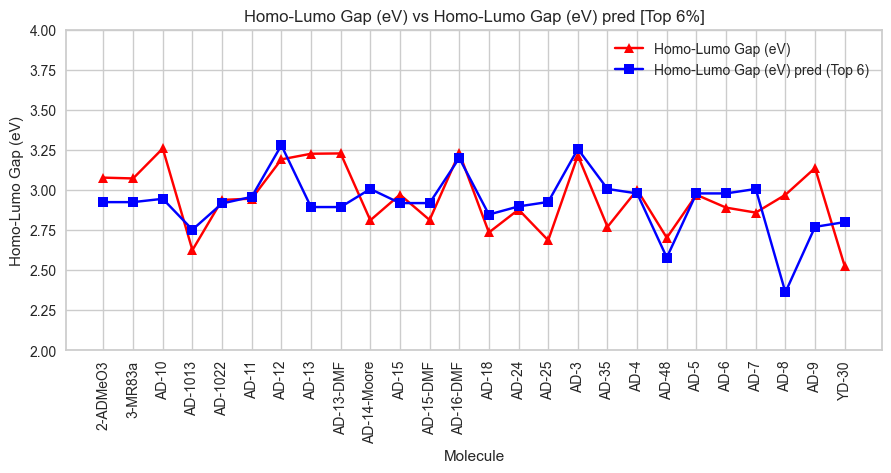

Percentile 12%: RMSE: 0.21453423809535663, R2: -0.11068578516537486


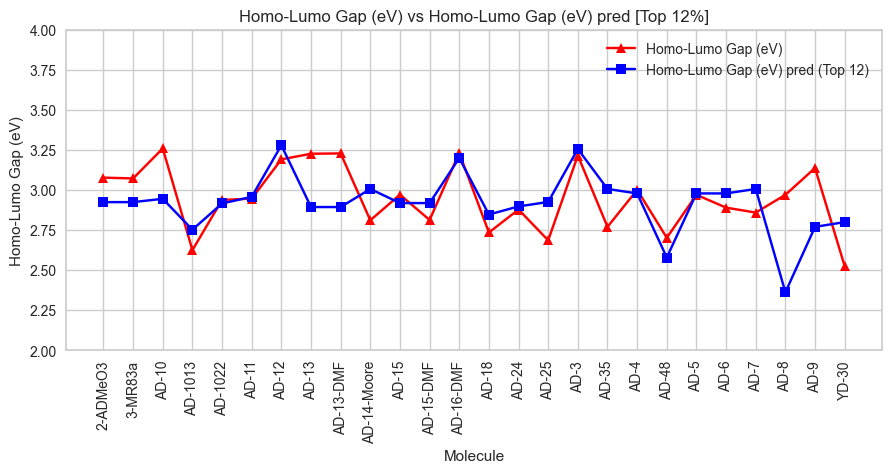

Percentile 18%: RMSE: 0.21453423809535663, R2: -0.11068578516537486


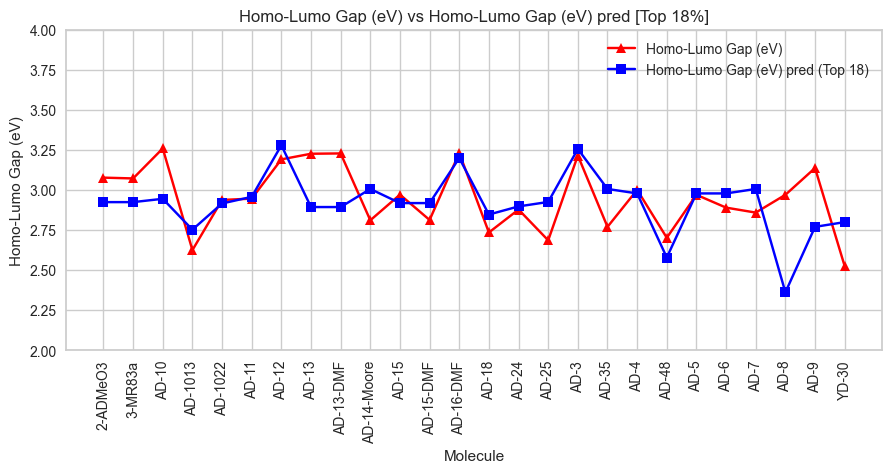

Percentile 24%: RMSE: 0.2273666418881189, R2: -0.24753139600525964


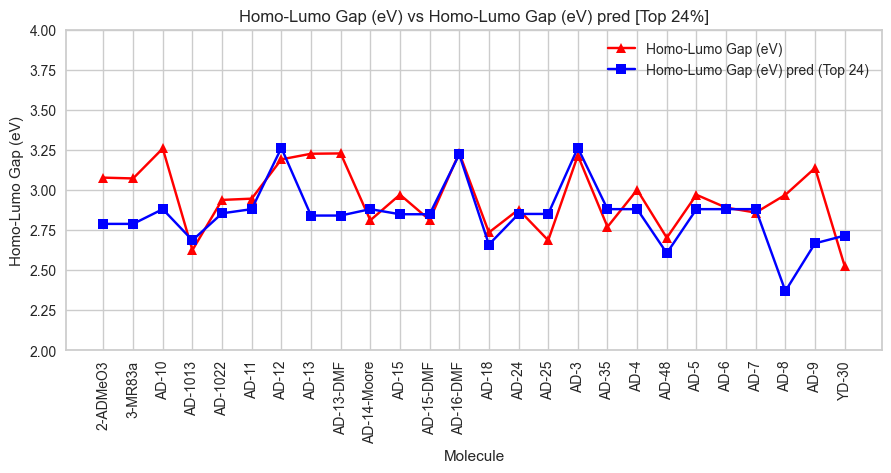

Percentile 30%: RMSE: 0.20619242068636112, R2: -0.025990604254178207


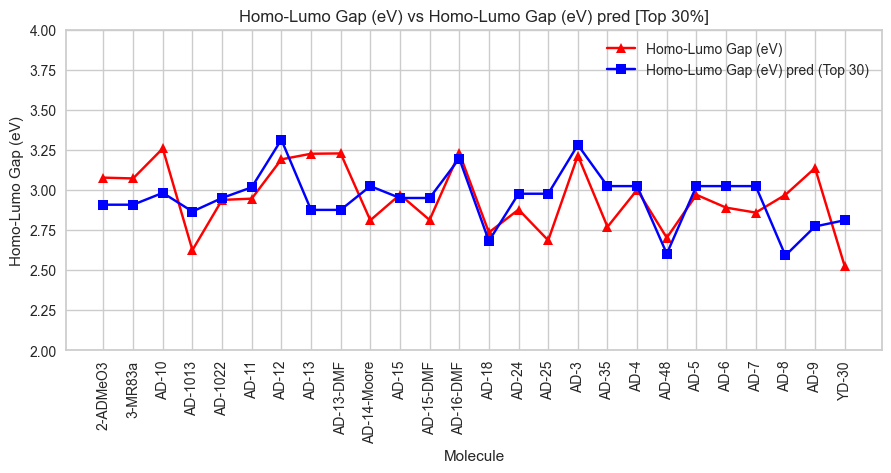

Percentile 36%: RMSE: 0.21236384331827268, R2: -0.08832634488303714


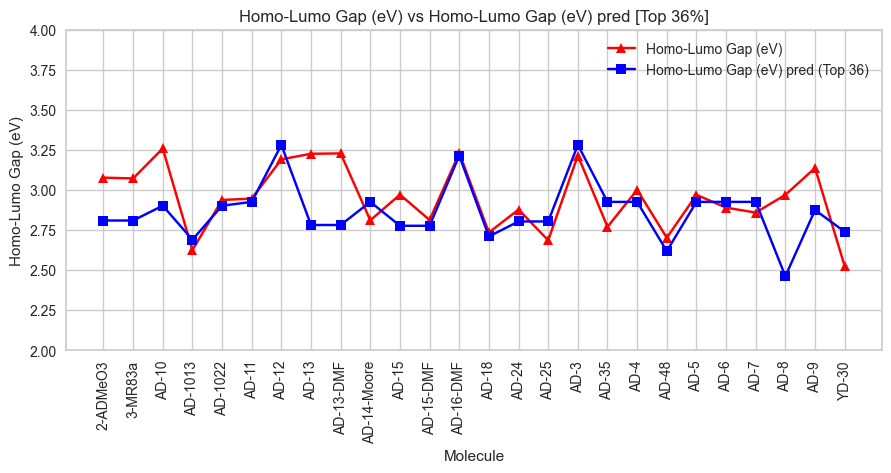

Percentile 42%: RMSE: 0.22419054508505148, R2: -0.21292116653843607


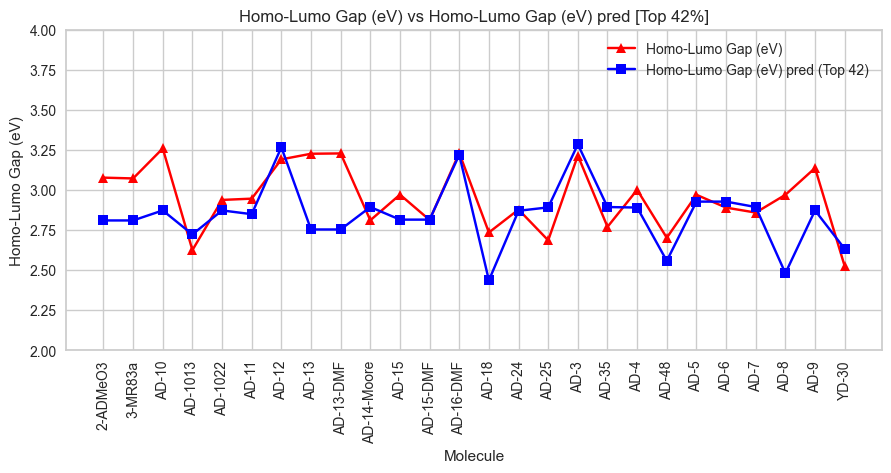

Percentile 48%: RMSE: 0.21296773661342455, R2: -0.0945248337606317


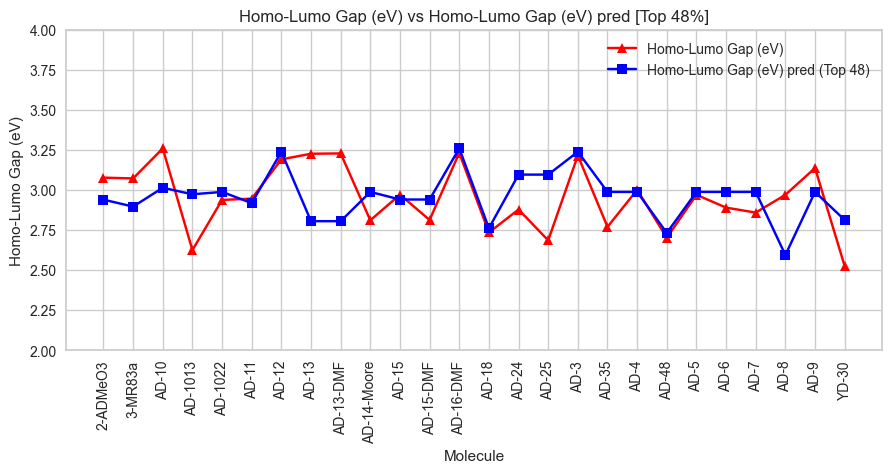

Percentile 54%: RMSE: 0.21304615833493554, R2: -0.09533106222144405


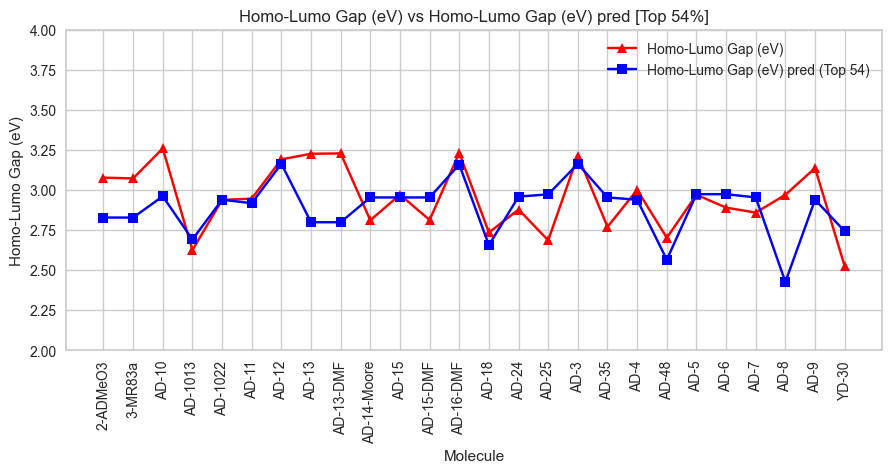

In [184]:
# Predict HOMO-LUMO Gap for curcumin_df_mf using the trained models
curcumin_df_mf_pred = curcumin_df_mf.copy()

for percentile in percentiles:
    filtered_df_name = f'opv_df_mf_top{percentile}'
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(resulting_dfs[filtered_df_name].iloc[:, -2048:], resulting_dfs[filtered_df_name]["GAP_calib"])
    
    curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'] = model.predict(curcumin_df_mf.iloc[:, -2048:])
    
    # Calculate metrics
    rmse = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], squared=False)
    r2 = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'])
    
    print(f'Percentile {percentile}%: RMSE: {rmse}, R2: {r2}')
    
    # Plotting
    plt.figure(figsize=(9, 4))
    plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker='^', label='Homo-Lumo Gap (eV)', color='Red')
    plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], marker='s', label=f'Homo-Lumo Gap (eV) pred (Top {percentile})', color='blue')
    plt.xlabel('Molecule')
    plt.ylabel('Homo-Lumo Gap (eV)')
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Top {percentile}%]')
    plt.legend()
    plt.ylim(2, 4)
    plt.xticks(rotation=90)
    plt.show()

In [190]:
# # morgan fingerprint in curcurmi_df dataframe
curcumin_df['Morgan_Fingerprints'] = curcumin_df['Smiles'].apply(generate_morgan_fingerprint_safe)
curcumin_df = curcumin_df[curcumin_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(curcumin_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
curcumin_df_mf = pd.concat([curcumin_df.drop(columns = ["Atom_Pair_Fingerprints"]), morgan_df], axis=1)
curcumin_df_mf.head()

,Molecule,Molecular Weight,LogP,Homo-Lumo Gap (eV),Smiles,Morgan_Fingerprints,morgan_0,morgan_1,morgan_2,morgan_3,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,2-ADMeO3,532.345,5.0293,3.077,COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3-MR83a,472.293,5.0121,3.072,COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AD-10,472.293,5.0121,3.259,COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AD-1013,482.335,7.2927,2.625,COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AD-1022,472.293,5.0121,2.938,COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# morgan fingerprint in opv_df dataframe
opv_df['Morgan_Fingerprints'] = opv_df['smiles'].apply(generate_morgan_fingerprint_safe)
opv_df = opv_df[opv_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(opv_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
opv_df_mf = pd.concat([opv_df.drop(columns = ["Atom_Pair_Fingerprints"]), morgan_df], axis=1)
opv_df_mf.head()

,smiles,GAP_calib,GAP_calc,mol,Morgan_Fingerprints,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,3.109059,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,2.634680,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,2.825687,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,3.342626,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,3.304822,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
import pandas as pd
import numpy as np
import gc
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem

# Generate Morgan Fingerprints for curcumin_df_mf and opv_df_mf
def generate_morgan_fingerprint(smiles, radius=4, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
        return list(fingerprint)
    else:
        return None

# Cosine similarity function
def calculate_cosine_similarity(fp1, fp2):
    return 1 - cosine(fp1, fp2)

# Special molecule fingerprint (Segment 05)
special_molecule_seg05 = Chem.MolFromSmiles("C/C=C/C=O")
special_molecule_seg05_fp = AllChem.GetMorganFingerprintAsBitVect(special_molecule_seg05, 2, nBits=2048)

# Calculate Cosine similarity for each molecule in opv_df_mf
opv_df_mf['similarity'] = opv_df_mf['Morgan_Fingerprints'].apply(lambda fp: calculate_cosine_similarity(special_molecule_seg05_fp, fp))

# Define XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'n_jobs': -1,
    'random_state': 123,
    'tree_method': 'auto'
}

# Filter opv_df_mf based on similarity percentiles and train models
percentiles = range(6, 60, 6)
resulting_dfs = {}
summary = []

for percentile in percentiles:
    quantile_value = opv_df_mf['similarity'].quantile(percentile / 100)
    filtered_df = opv_df_mf[opv_df_mf['similarity'] >= quantile_value].copy()
    
    # Convert fingerprints to more memory-efficient data types
    morgan_fp_df = pd.DataFrame(filtered_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)], dtype=np.uint8)
    
    filtered_df = pd.concat([filtered_df.reset_index(drop=True), morgan_fp_df], axis=1)
    
    # Train XGBoost model
    X = filtered_df.iloc[:, -2048:]  # Assuming fingerprint columns are the last ones
    y = filtered_df["GAP_calib"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    xgb_model = xgb.XGBRegressor(**xgb_params)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    df_name = f'opv_df_mf_top{percentile}'
    resulting_dfs[df_name] = filtered_df
    
    summary.append({
        'DataFrame': df_name,
        'Rows': filtered_df.shape[0],
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f'{df_name}: Train R2: {train_r2}, Test R2: {test_r2}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    
    # Clear memory
    del filtered_df, morgan_fp_df, X, y, X_train, X_test, y_train, y_test, xgb_model, y_train_pred, y_test_pred
    gc.collect()

summary_df = pd.DataFrame(summary)
summary_df

opv_df_mf_top6: Train R2: 0.8605446120247707, Test R2: 0.835727930713251, Train RMSE: 0.23025692084817864, Test RMSE: 0.24619043002648167
opv_df_mf_top12: Train R2: 0.8605446120247707, Test R2: 0.835727930713251, Train RMSE: 0.23025692084817864, Test RMSE: 0.24619043002648167
opv_df_mf_top18: Train R2: 0.8605446120247707, Test R2: 0.835727930713251, Train RMSE: 0.23025692084817864, Test RMSE: 0.24619043002648167
opv_df_mf_top24: Train R2: 0.8744425098548245, Test R2: 0.8539175740503776, Train RMSE: 0.22020155931984153, Test RMSE: 0.23649094318453265
opv_df_mf_top30: Train R2: 0.8788406241244809, Test R2: 0.8618456789377529, Train RMSE: 0.21707398549668028, Test RMSE: 0.22967588968375455
opv_df_mf_top36: Train R2: 0.8820639100284576, Test R2: 0.8641436872205522, Train RMSE: 0.21291508538666845, Test RMSE: 0.2282261973444131
opv_df_mf_top42: Train R2: 0.8829653557074922, Test R2: 0.8637029840918564, Train RMSE: 0.20793000401497055, Test RMSE: 0.2243511325588798
opv_df_mf_top48: Train R2:

,DataFrame,Rows,Train R2,Test R2,Train RMSE,Test RMSE
0,opv_df_mf_top6,51256,0.860545,0.835728,0.230257,0.246190
1,opv_df_mf_top12,51256,0.860545,0.835728,0.230257,0.246190
2,opv_df_mf_top18,51256,0.860545,0.835728,0.230257,0.246190
3,opv_df_mf_top24,38981,0.874443,0.853918,0.220202,0.236491
4,opv_df_mf_top30,36287,0.878841,0.861846,0.217074,0.229676
5,opv_df_mf_top36,32832,0.882064,0.864144,0.212915,0.228226
6,opv_df_mf_top42,29964,0.882965,0.863703,0.207930,0.224351
7,opv_df_mf_top48,26733,0.875259,0.852707,0.201426,0.217439
8,opv_df_mf_top54,23890,0.879119,0.858498,0.191849,0.207244


Percentile 6%: RMSE: 0.21453423809535663, R2: -0.11068578516537486


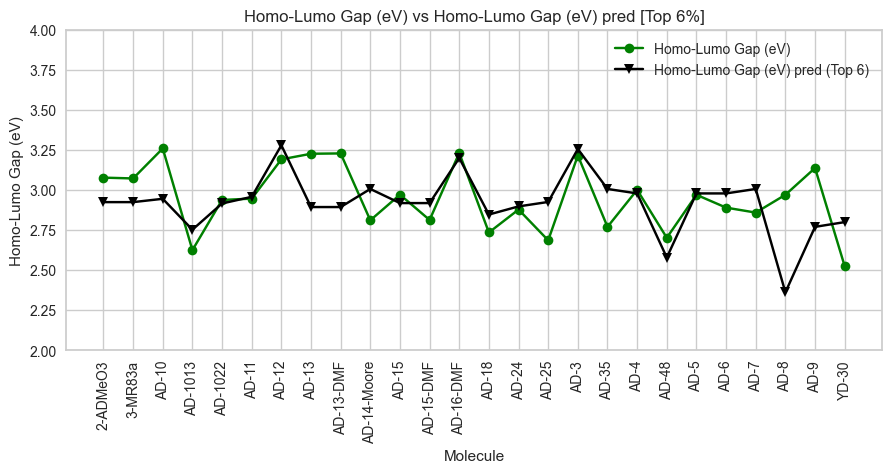

Percentile 12%: RMSE: 0.21453423809535663, R2: -0.11068578516537486


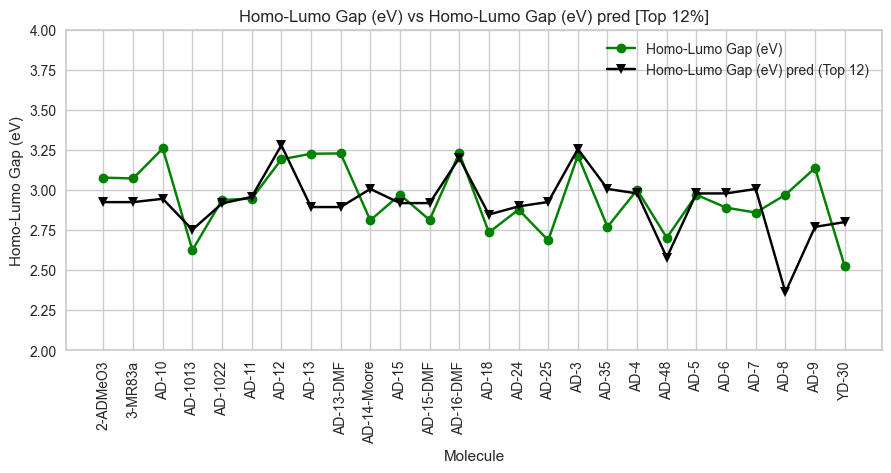

Percentile 18%: RMSE: 0.21453423809535663, R2: -0.11068578516537486


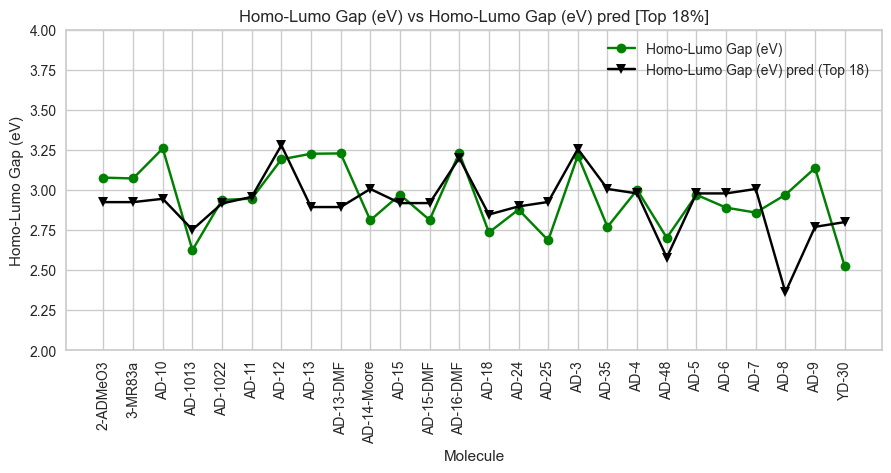

Percentile 24%: RMSE: 0.2273666418881189, R2: -0.24753139600525964


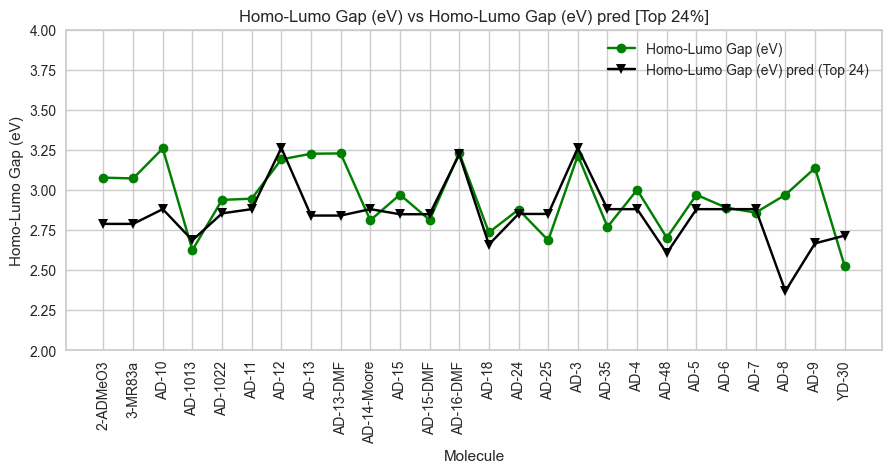

Percentile 30%: RMSE: 0.20619242068636112, R2: -0.025990604254178207


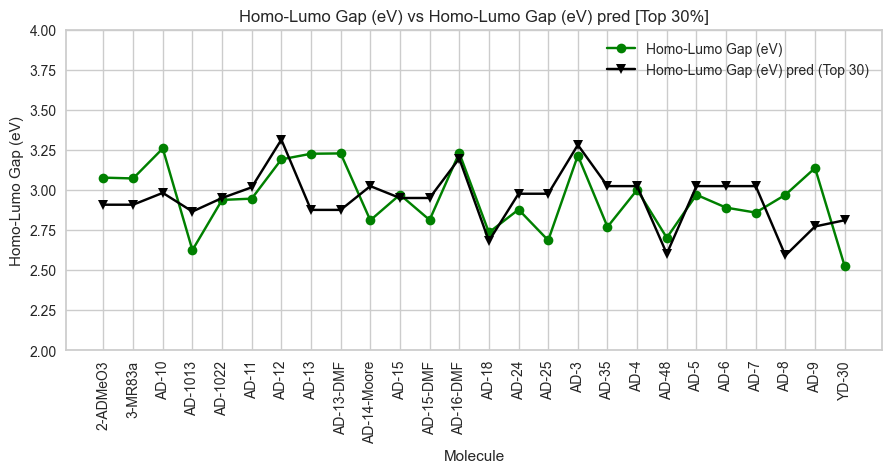

Percentile 36%: RMSE: 0.21236384331827268, R2: -0.08832634488303714


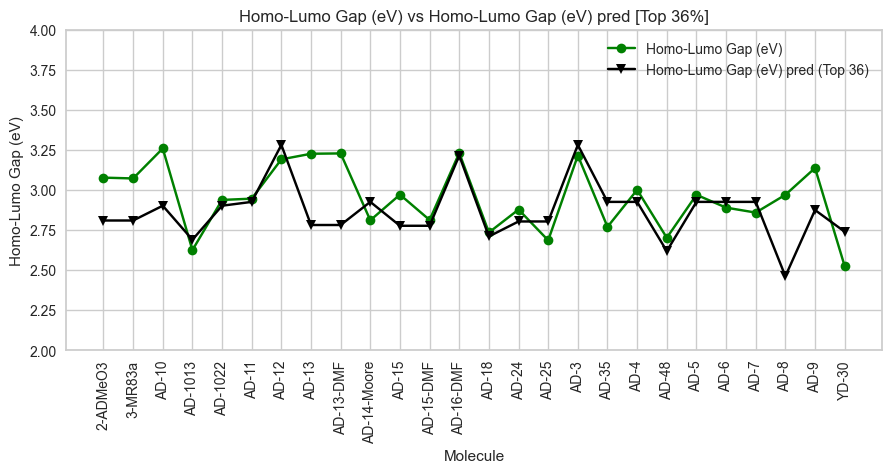

Percentile 42%: RMSE: 0.22419054508505148, R2: -0.21292116653843607


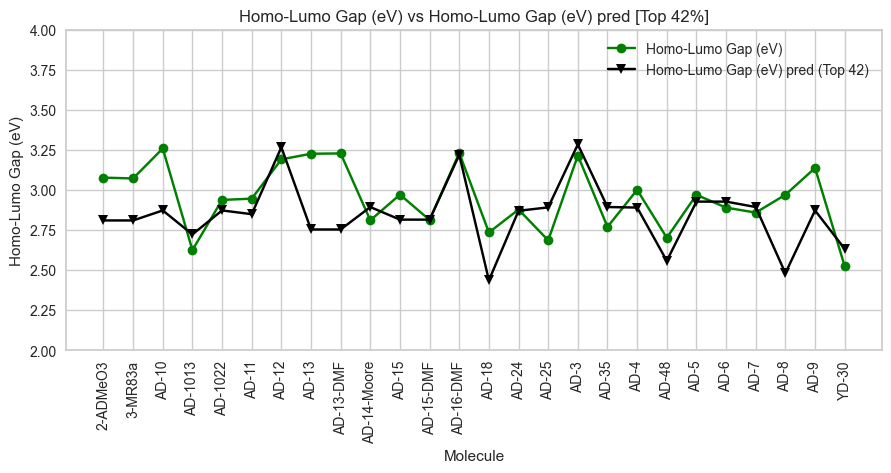

Percentile 48%: RMSE: 0.21865890220249404, R2: -0.15380473226408498


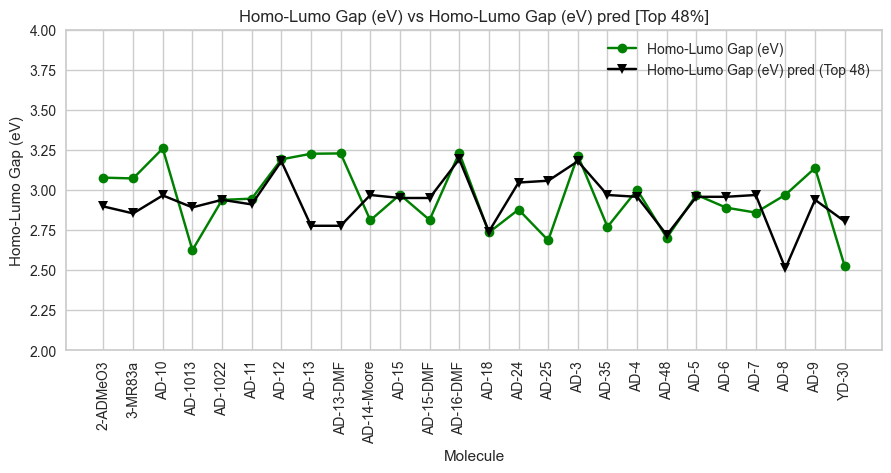

Percentile 54%: RMSE: 0.2920910111767075, R2: -1.058895827593585


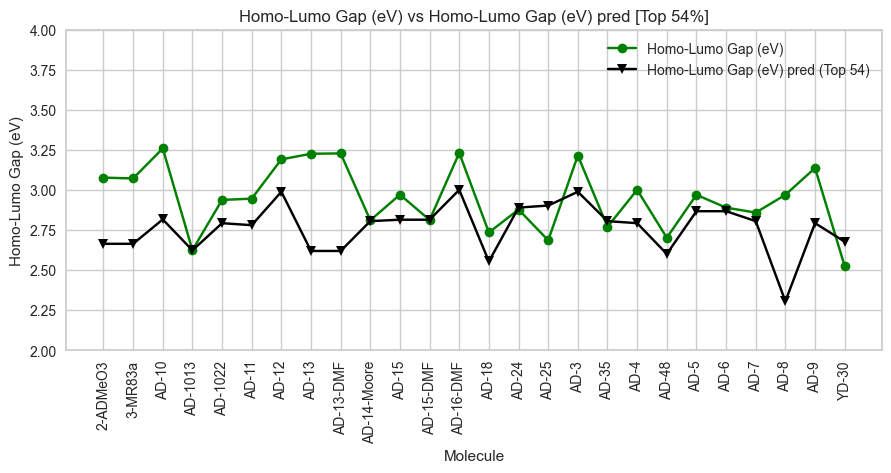

In [196]:
# Predict HOMO-LUMO Gap for curcumin_df_mf using the trained models
curcumin_df_mf_pred = curcumin_df_mf.copy()

for percentile in percentiles:
    filtered_df_name = f'opv_df_mf_top{percentile}'
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(resulting_dfs[filtered_df_name].iloc[:, -2048:], resulting_dfs[filtered_df_name]["GAP_calib"])
    
    curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'] = model.predict(curcumin_df_mf.iloc[:, -2048:])
    
    # Calculate metrics
    rmse = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], squared=False)
    r2 = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'])
    
    print(f'Percentile {percentile}%: RMSE: {rmse}, R2: {r2}')
    
    # Plotting
    plt.figure(figsize=(9, 4))
    plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker='o', label='Homo-Lumo Gap (eV)', color='green')
    plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], marker='v', label=f'Homo-Lumo Gap (eV) pred (Top {percentile})', color='black')
    plt.xlabel('Molecule')
    plt.ylabel('Homo-Lumo Gap (eV)')
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Top {percentile}%]')
    plt.legend()
    plt.ylim(2, 4)
    plt.xticks(rotation=90)
    plt.show()


In [197]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors

# Generate Atom Pair Fingerprints for curcumin_df_apf and opv_df_apf
def generate_atom_pair_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=2048)
        return list(fingerprint)
    else:
        return None

# atome pair fingerpint to curcumin_df
curcumin_df['Atom_Pair_Fingerprints'] = curcumin_df['Smiles'].apply(generate_atom_pair_fingerprint)
curcumin_df = curcumin_df[curcumin_df['Atom_Pair_Fingerprints'].notnull()].reset_index(drop=True)
atompair_df = pd.DataFrame(curcumin_df['Atom_Pair_Fingerprints'].tolist(), columns=[f'atompair_{i}' for i in range(2048)])
curcumin_df_apf = pd.concat([curcumin_df.drop(columns = ["Morgan_Fingerprints"]), atompair_df], axis=1)
curcumin_df_apf.head()

,Molecule,Molecular Weight,LogP,Homo-Lumo Gap (eV),Smiles,Atom_Pair_Fingerprints,atompair_0,atompair_1,atompair_2,atompair_3,...,atompair_2038,atompair_2039,atompair_2040,atompair_2041,atompair_2042,atompair_2043,atompair_2044,atompair_2045,atompair_2046,atompair_2047
0,2-ADMeO3,532.345,5.0293,3.077,COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...,"[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3-MR83a,472.293,5.0121,3.072,COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...,"[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AD-10,472.293,5.0121,3.259,COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...,"[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AD-1013,482.335,7.2927,2.625,COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AD-1022,472.293,5.0121,2.938,COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...,"[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
# atome pair fingerpint to opv_df
opv_df['Atom_Pair_Fingerprints'] = opv_df['smiles'].apply(generate_atom_pair_fingerprint)
opv_df = opv_df[opv_df['Atom_Pair_Fingerprints'].notnull()].reset_index(drop=True)
atompair_df = pd.DataFrame(opv_df['Atom_Pair_Fingerprints'].tolist(), columns=[f'atompair_{i}' for i in range(2048)])
opv_df_apf = pd.concat([opv_df.drop(columns = ["Morgan_Fingerprints"]), atompair_df], axis=1)
opv_df_apf.head()

,smiles,GAP_calib,GAP_calc,mol,Atom_Pair_Fingerprints,atompair_0,atompair_1,atompair_2,atompair_3,atompair_4,...,atompair_2038,atompair_2039,atompair_2040,atompair_2041,atompair_2042,atompair_2043,atompair_2044,atompair_2045,atompair_2046,atompair_2047
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,3.109059,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...",1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,2.634680,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...",1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,2.825687,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,3.342626,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,3.304822,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, ...",0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,0


In [199]:
import pandas as pd
import numpy as np
import gc
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors

# Generate Atom Pair Fingerprints for curcumin_df_apf and opv_df_apf
def generate_atom_pair_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=2048)
        return list(fingerprint)
    else:
        return None

# Cosine similarity function
def calculate_cosine_similarity(fp1, fp2):
    return 1 - cosine(fp1, fp2)

# Special molecule fingerprint (Segment 03)
special_molecule_seg03 = Chem.MolFromSmiles("C/C=C/C(=O)CC(=O)/C=C/C")
special_molecule_seg03_fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(special_molecule_seg03, nBits=2048)

# Calculate Cosine similarity for each molecule in opv_df_apf
opv_df_apf['similarity'] = opv_df_apf['Atom_Pair_Fingerprints'].apply(lambda fp: calculate_cosine_similarity(special_molecule_seg03_fp, fp))

# Define XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'n_jobs': -1,
    'random_state': 123,
    'tree_method': 'auto'
}

# Filter opv_df_apf based on similarity percentiles and train models
percentiles = range(6, 60, 6)
resulting_dfs = {}
summary = []

for percentile in percentiles:
    quantile_value = opv_df_apf['similarity'].quantile(percentile / 100)
    filtered_df = opv_df_apf[opv_df_apf['similarity'] >= quantile_value].copy()
    
    # Convert fingerprints to more memory-efficient data types
    atom_pair_fp_df = pd.DataFrame(filtered_df['Atom_Pair_Fingerprints'].tolist(), columns=[f'apf_{i}' for i in range(2048)], dtype=np.uint8)
    
    filtered_df = pd.concat([filtered_df.reset_index(drop=True), atom_pair_fp_df], axis=1)
    
    # Train XGBoost model
    X = filtered_df.iloc[:, 6:]  # Assuming fingerprint columns are the last ones
    y = filtered_df["GAP_calib"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    xgb_model = xgb.XGBRegressor(**xgb_params)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    df_name = f'opv_df_apf_top{percentile}'
    resulting_dfs[df_name] = filtered_df
    
    summary.append({
        'DataFrame': df_name,
        'Rows': filtered_df.shape[0],
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f'{df_name}: Train R2: {train_r2}, Test R2: {test_r2}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    
    # Clear memory
    del filtered_df, atom_pair_fp_df, X, y, X_train, X_test, y_train, y_test, xgb_model, y_train_pred, y_test_pred
    gc.collect()

summary_df = pd.DataFrame(summary)
summary_df

opv_df_apf_top6: Train R2: 0.8810143410049331, Test R2: 0.8383268839035398, Train RMSE: 0.21081452028384368, Test RMSE: 0.247924926805861
opv_df_apf_top12: Train R2: 0.8850406087263469, Test R2: 0.8505349632311379, Train RMSE: 0.20792419202071832, Test RMSE: 0.23662759225661775
opv_df_apf_top18: Train R2: 0.8890410730409072, Test R2: 0.8235754562394364, Train RMSE: 0.20387525491836347, Test RMSE: 0.26241323254521753
opv_df_apf_top24: Train R2: 0.8930572790187469, Test R2: 0.8588397612877462, Train RMSE: 0.20239389226668558, Test RMSE: 0.22673308250869809
opv_df_apf_top30: Train R2: 0.90047664362457, Test R2: 0.8655579352738396, Train RMSE: 0.19380297340225525, Test RMSE: 0.22658141317347244
opv_df_apf_top36: Train R2: 0.9046674436999869, Test R2: 0.8772018134798198, Train RMSE: 0.18965068641894828, Test RMSE: 0.2180489044616367
opv_df_apf_top42: Train R2: 0.9098005512459058, Test R2: 0.882736843324581, Train RMSE: 0.18481388129796206, Test RMSE: 0.21450694727653385
opv_df_apf_top48: Tr

,DataFrame,Rows,Train R2,Test R2,Train RMSE,Test RMSE
0,opv_df_apf_top6,48184,0.881014,0.838327,0.210815,0.247925
1,opv_df_apf_top12,45109,0.885041,0.850535,0.207924,0.236628
2,opv_df_apf_top18,42035,0.889041,0.823575,0.203875,0.262413
3,opv_df_apf_top24,38956,0.893057,0.858840,0.202394,0.226733
4,opv_df_apf_top30,35879,0.900477,0.865558,0.193803,0.226581
5,opv_df_apf_top36,32813,0.904667,0.877202,0.189651,0.218049
6,opv_df_apf_top42,29734,0.909801,0.882737,0.184814,0.214507
7,opv_df_apf_top48,26666,0.916054,0.877794,0.178576,0.216757
8,opv_df_apf_top54,23578,0.922816,0.892166,0.171708,0.202046


In [ ]:
# Predict HOMO-LUMO Gap for curcumin_df_apf using the trained models
curcumin_df_apf_pred = curcumin_df_apf.copy()

for percentile in percentiles:
    filtered_df_name = f'opv_df_apf_top{percentile}'
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(resulting_dfs[filtered_df_name].iloc[:, 6:], resulting_dfs[filtered_df_name]["GAP_calib"])
    
    curcumin_df_apf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'] = model.predict(curcumin_df_apf_pred.iloc[:, 6:])
    
    # Calculate metrics
    rmse = mean_squared_error(curcumin_df_apf_pred['Homo-Lumo Gap (eV)'], curcumin_df_apf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], squared=False)
    r2 = r2_score(curcumin_df_apf_pred['Homo-Lumo Gap (eV)'], curcumin_df_apf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'])
    
    print(f'Percentile {percentile}%: RMSE: {rmse}, R2: {r2}')
    
    # Plotting
    plt.figure(figsize=(9, 4))
    plt.plot(curcumin_df_apf_pred['Molecule'], curcumin_df_apf_pred['Homo-Lumo Gap (eV)'], marker='v', label='Homo-Lumo Gap (eV)', color='black')
    plt.plot(curcumin_df_apf_pred['Molecule'], curcumin_df_apf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], marker='o', label=f'Homo-Lumo Gap (eV) pred (Top {percentile})', color='green')
    plt.xlabel('Molecule')
    plt.ylabel('Homo-Lumo Gap (eV)')
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Top {percentile}%]')
    plt.legend()
    plt.ylim(2, 4)
    plt.xticks(rotation=90)
    plt.show()

In [221]:
# Function to convert RDKit ExplicitBitVect to list of integers
def fingerprint_to_list(fp):
    arr = np.zeros((fp.GetNumBits(),), dtype=np.uint8)
    for bit in fp.GetOnBits():
        arr[bit] = 1
    return arr.tolist()

# Generate Morgan Fingerprints for curcumin_df_mf and opv_df_mf
def generate_morgan_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
        return fingerprint_to_list(fingerprint)
    else:
        return None

curcumin_df['Morgan_Fingerprints'] = curcumin_df['Smiles'].apply(generate_morgan_fingerprint_safe)
curcumin_df = curcumin_df[curcumin_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(curcumin_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
curcumin_df_mf = pd.concat([curcumin_df.drop(columns = ["Atom_Pair_Fingerprints"]), morgan_df], axis=1)
curcumin_df_mf.head()

,Molecule,Molecular Weight,LogP,Homo-Lumo Gap (eV),Smiles,Morgan_Fingerprints,morgan_0,morgan_1,morgan_2,morgan_3,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,2-ADMeO3,532.345,5.0293,3.077,COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3-MR83a,472.293,5.0121,3.072,COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AD-10,472.293,5.0121,3.259,COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AD-1013,482.335,7.2927,2.625,COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AD-1022,472.293,5.0121,2.938,COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
# morgan fingerprint in opv_df dataframe
opv_df['Morgan_Fingerprints'] = opv_df['smiles'].apply(generate_morgan_fingerprint_safe)
opv_df = opv_df[opv_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(opv_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
opv_df_mf = pd.concat([opv_df.drop(columns = ["Atom_Pair_Fingerprints"]), morgan_df], axis=1)
opv_df_mf.head()

,smiles,GAP_calib,GAP_calc,mol,Morgan_Fingerprints,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,3.109059,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,2.634680,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,2.825687,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,3.342626,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,3.304822,<rdkit.Chem.rdchem.Mol object at 0x0000024F3C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
import pandas as pd
import numpy as np
import gc
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to convert RDKit ExplicitBitVect to list of integers
def fingerprint_to_list(fp):
    arr = np.zeros((fp.GetNumBits(),), dtype=np.uint8)
    for bit in fp.GetOnBits():
        arr[bit] = 1
    return arr.tolist()

# Generate Morgan Fingerprints for curcumin_df_mf and opv_df_mf
def generate_morgan_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
        return fingerprint_to_list(fingerprint)
    else:
        return None

# Cosine similarity function
def calculate_cosine_similarity(fp1, fp2):
    return 1 - cosine(fp1, fp2)

# Special molecule fingerprint (Segment 06)
special_molecule_seg06 = Chem.MolFromSmiles("C/C=C/C1=CC(/C=C/C)=[O+][B-](F)(F)O1")
special_molecule_seg06_fp = AllChem.GetMorganFingerprintAsBitVect(special_molecule_seg06, 2, nBits=2048)

# Calculate Cosine similarity for each molecule in opv_df_mf
opv_df_mf['similarity'] = opv_df_mf['Morgan_Fingerprints'].apply(lambda fp: calculate_cosine_similarity(special_molecule_seg06_fp, fp))

# Define LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': 'regression',
    'random_state': 123,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0,
    'verbose': -1
}

# Filter opv_df_mf based on similarity percentiles and train models
percentiles = range(6, 60, 6)
resulting_dfs = {}
summary = []

for percentile in percentiles:
    quantile_value = opv_df_mf['similarity'].quantile(percentile / 100)
    filtered_df = opv_df_mf[opv_df_mf['similarity'] >= quantile_value].copy()
    
    # Convert fingerprints to more memory-efficient data types
    morgan_fp_df = pd.DataFrame(filtered_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)], dtype=np.uint8)
    
    filtered_df = pd.concat([filtered_df.reset_index(drop=True), morgan_fp_df], axis=1)
    
    # Train LightGBM model
    X = filtered_df.iloc[:, -2048:]  # Assuming fingerprint columns are the last ones
    y = filtered_df["GAP_calib"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    lgb_model = lgb.LGBMRegressor(**params)
    lgb_model.fit(X_train, y_train)
    
    y_train_pred = lgb_model.predict(X_train)
    y_test_pred = lgb_model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    df_name = f'opv_df_mf_top{percentile}'
    resulting_dfs[df_name] = filtered_df
    
    summary.append({
        'DataFrame': df_name,
        'Rows': filtered_df.shape[0],
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f'{df_name}: Train R2: {train_r2}, Test R2: {test_r2}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    
    # Clear memory
    del filtered_df, morgan_fp_df, X, y, X_train, X_test, y_train, y_test, lgb_model, y_train_pred, y_test_pred
    gc.collect()

summary_df = pd.DataFrame(summary)
summary_df

opv_df_mf_top6: Train R2: 0.8838908294600245, Test R2: 0.8626362060260447, Train RMSE: 0.20910594638255775, Test RMSE: 0.22664793411878234
opv_df_mf_top12: Train R2: 0.8798071536568904, Test R2: 0.8847897816023669, Train RMSE: 0.21336792311464764, Test RMSE: 0.20648931966253714
opv_df_mf_top18: Train R2: 0.8884711452098515, Test R2: 0.8385596604549829, Train RMSE: 0.20402852537260197, Test RMSE: 0.24807366637181713
opv_df_mf_top24: Train R2: 0.8790657995490776, Test R2: 0.8834877527604711, Train RMSE: 0.21242534890884882, Test RMSE: 0.20460830934585408
opv_df_mf_top30: Train R2: 0.8840111240261016, Test R2: 0.8809782353369847, Train RMSE: 0.20637744986878334, Test RMSE: 0.20414144690296182
opv_df_mf_top36: Train R2: 0.8943201473792013, Test R2: 0.892527703693432, Train RMSE: 0.1933626378525744, Test RMSE: 0.19534984303746836
opv_df_mf_top42: Train R2: 0.8992487513448135, Test R2: 0.8886257006334066, Train RMSE: 0.1881987527081323, Test RMSE: 0.19808808921690815
opv_df_mf_top48: Train R

,DataFrame,Rows,Train R2,Test R2,Train RMSE,Test RMSE
0,opv_df_mf_top6,48220,0.883891,0.862636,0.209106,0.226648
1,opv_df_mf_top12,45281,0.879807,0.884790,0.213368,0.206489
2,opv_df_mf_top18,42370,0.888471,0.838560,0.204029,0.248074
3,opv_df_mf_top24,39082,0.879066,0.883488,0.212425,0.204608
4,opv_df_mf_top30,36101,0.884011,0.880978,0.206377,0.204141
5,opv_df_mf_top36,33013,0.894320,0.892528,0.193363,0.195350
6,opv_df_mf_top42,29816,0.899249,0.888626,0.188199,0.198088
7,opv_df_mf_top48,26674,0.899498,0.887218,0.187998,0.197617
8,opv_df_mf_top54,23917,0.899747,0.891963,0.186471,0.193185


Percentile 6%: RMSE: 0.26310938751843654, R2: -0.6705930733068408


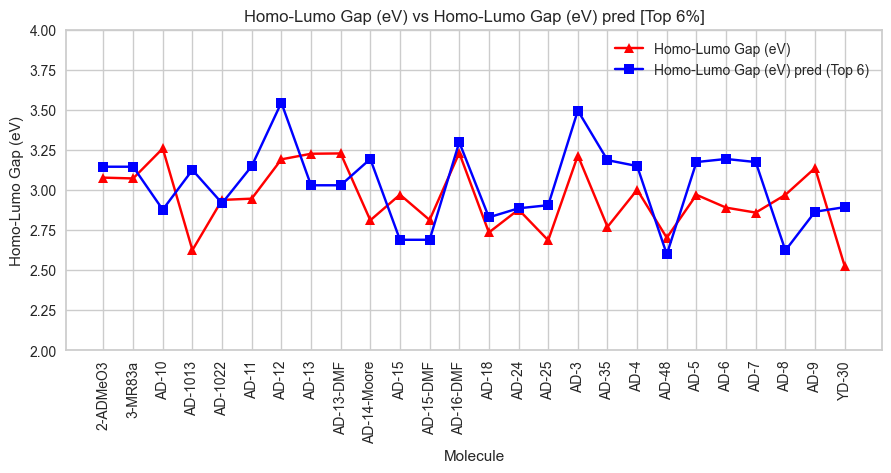

Percentile 12%: RMSE: 0.23480743514767435, R2: -0.3305208313529673


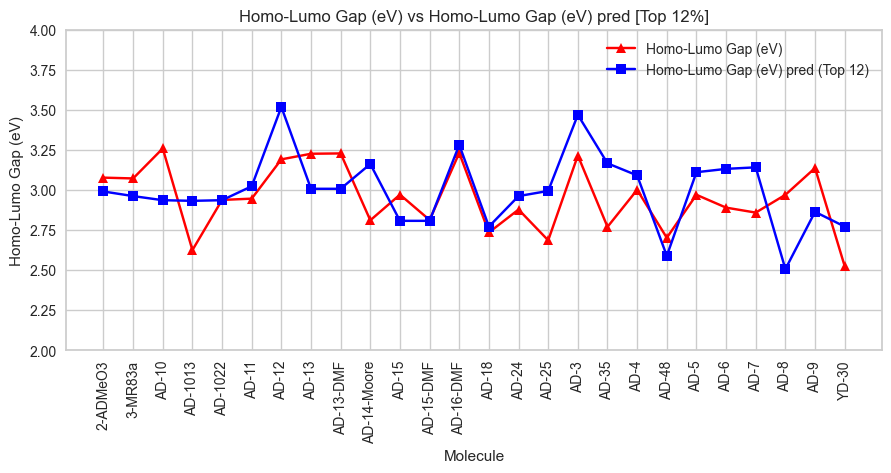

Percentile 18%: RMSE: 0.24093863292016038, R2: -0.4009120561699975


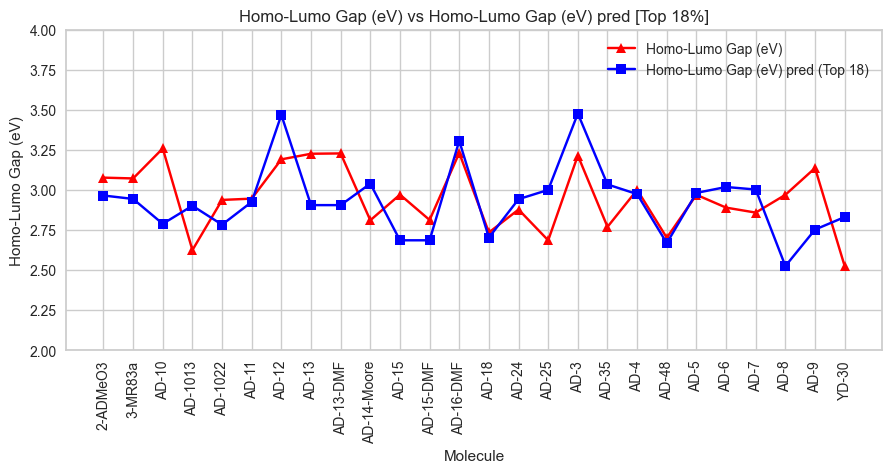

Percentile 24%: RMSE: 0.2597480038605937, R2: -0.6281800408100995


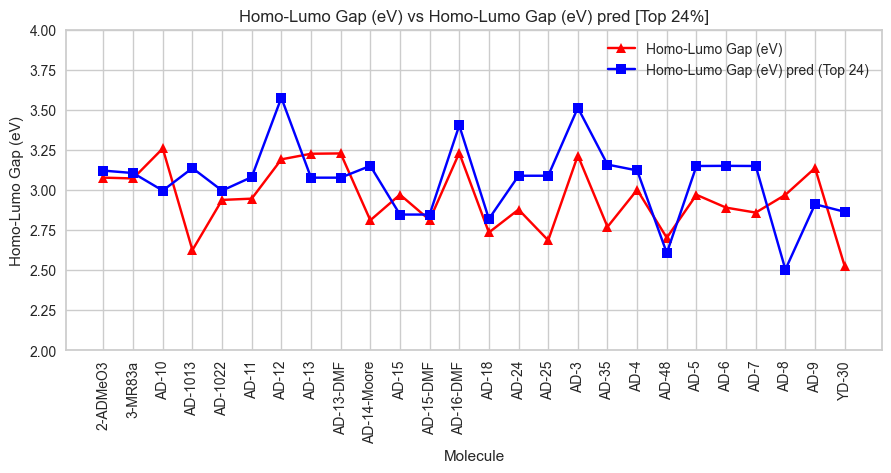

Percentile 30%: RMSE: 0.2271411396955638, R2: -0.24505802035388102


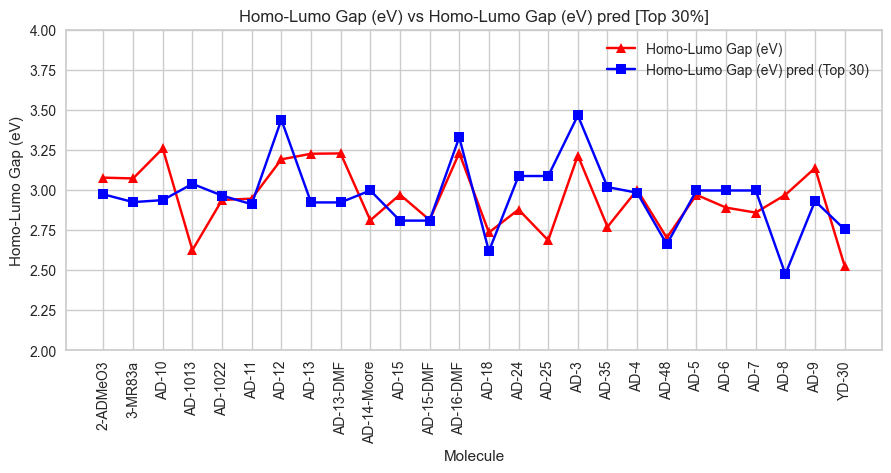

Percentile 36%: RMSE: 0.24035518576634243, R2: -0.39413548819941546


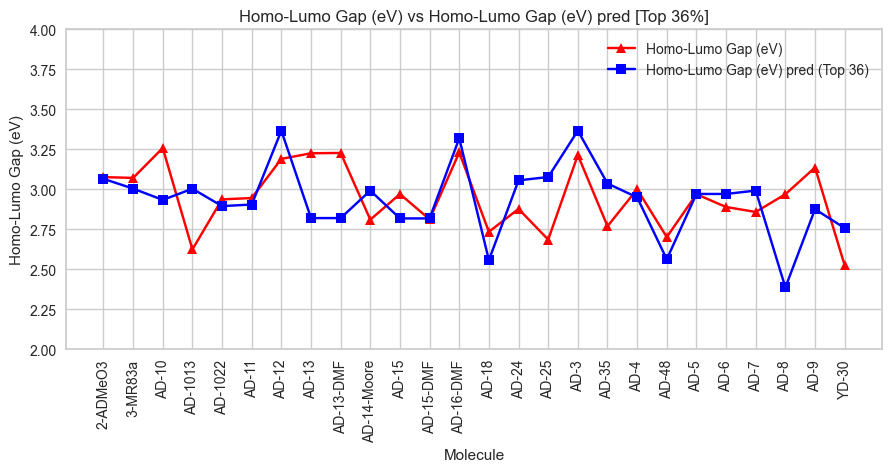

Percentile 42%: RMSE: 0.24392962891581046, R2: -0.43590960096206954


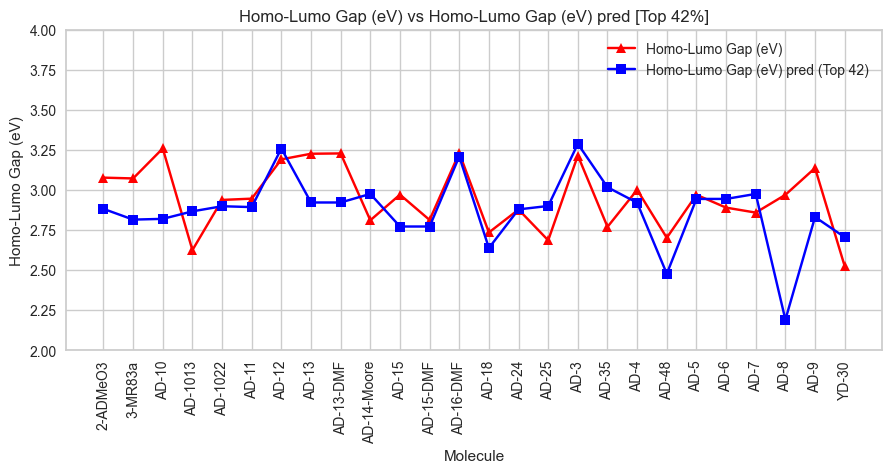

Percentile 48%: RMSE: 0.24646315568594754, R2: -0.4658920813494445


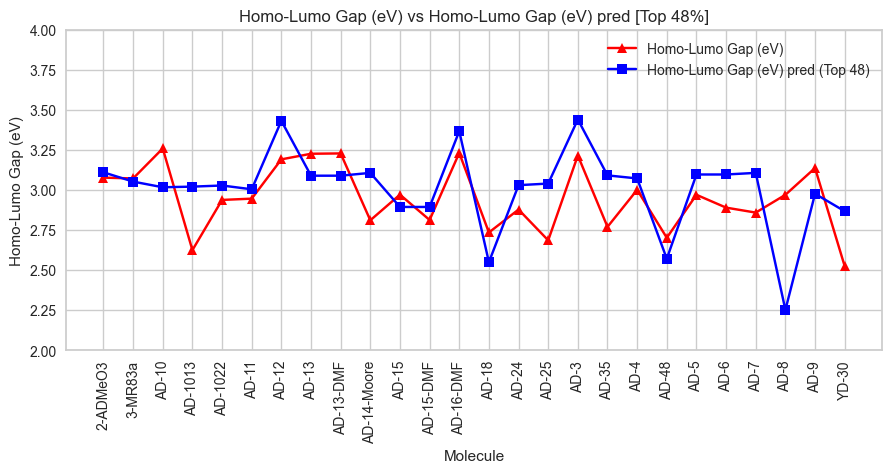

Percentile 54%: RMSE: 0.2258322924175841, R2: -0.23075065413563012


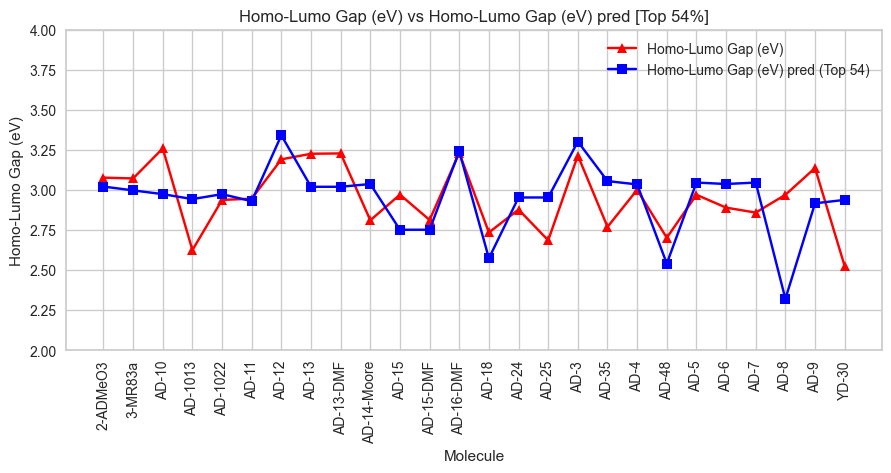

In [224]:
# Predict HOMO-LUMO Gap for curcumin_df_mf using the trained models
curcumin_df_mf_pred = curcumin_df_mf.copy()

for percentile in percentiles:
    filtered_df_name = f'opv_df_mf_top{percentile}'
    model = lgb.LGBMRegressor(**params)
    model.fit(resulting_dfs[filtered_df_name].iloc[:, -2048:], resulting_dfs[filtered_df_name]["GAP_calib"])
    
    curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'] = model.predict(curcumin_df_mf.iloc[:, -2048:])
    
    # Calculate metrics
    rmse = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], squared=False)
    r2 = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'])
    
    print(f'Percentile {percentile}%: RMSE: {rmse}, R2: {r2}')
    
    # Plotting
    plt.figure(figsize=(9, 4))
    plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker='^', label='Homo-Lumo Gap (eV)', color='Red')
    plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], marker='s', label=f'Homo-Lumo Gap (eV) pred (Top {percentile})', color='blue')
    plt.xlabel('Molecule')
    plt.ylabel('Homo-Lumo Gap (eV)')
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Top {percentile}%]')
    plt.legend()
    plt.ylim(2, 4)
    plt.xticks(rotation=90)
    plt.show()